In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pylab as plt
from math import sqrt

In [4]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

In [57]:
file_name1 = dir_origen_csv + "medidores_casi_uniformes2.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df

,fecha,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,Longitud,CLASIFICACION,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth
0,2019-04-04 06:28:44,15029835,1142597,131.1979,127.9215,131.9837,0.0263,0.0017,0.0264,A3,...,-79.4733,IGLESIA,0.4500,0.0000,bajo,7,0,0,0.225000,14
1,2019-04-04 08:28:44,15029835,1143023,128.4270,127.4788,129.9663,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.1830,0.0090,bajo,7,0,0,0.091500,14
2,2019-04-04 10:28:44,15029835,1143417,125.9862,125.7077,128.2971,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.048000,14
3,2019-04-04 12:28:45,15029835,1143779,126.8655,126.0735,128.6225,0.0013,0.0016,0.0114,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.047993,14
4,2019-04-04 14:28:45,15029835,1144165,125.2453,123.8318,127.2888,0.1740,0.0020,0.0110,A3,...,-79.4733,IGLESIA,0.1230,0.0000,bajo,7,0,0,0.061500,14
5,2019-04-04 16:28:45,15029835,1144530,125.9855,125.0129,128.1258,0.0013,0.0017,0.0112,A3,...,-79.4733,IGLESIA,0.2490,0.0000,bajo,7,0,0,0.124500,14
6,2019-04-05 06:28:47,15029835,1147537,129.0491,127.8222,130.0290,0.0266,0.0017,0.0263,A3,...,-79.4733,IGLESIA,0.4470,0.0000,bajo,7,0,0,0.223500,14
7,2019-04-05 08:28:47,15029835,1147941,127.9209,127.1520,129.3010,0.0013,0.0016,0.0113,A3,...,-79.4733,IGLESIA,0.1650,0.0120,bajo,7,0,0,0.082500,14
8,2019-04-05 10:28:48,15029835,1148346,126.8511,126.2283,128.2661,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0930,0.0000,bajo,7,0,0,0.046494,14
9,2019-04-05 12:55:05,15029835,1148711,125.7741,124.2303,127.2888,0.0015,0.0016,0.0111,A3,...,-79.4733,IGLESIA,0.0720,0.0000,bajo,7,0,0,0.029532,14


In [58]:
df["medidor"].unique()

array([15029835, 15029844, 15029846, 15029847, 15029977, 15842885,
       15842894, 16567743, 16567746, 16567760, 16567761, 16567763,
       16951175, 16951176, 16951180, 16951199, 16951201, 16951203,
       16951205, 16951207, 16951208, 16951209, 16951216, 16951219,
       16951220, 16951221, 16951222, 28006904, 28877074, 35924863,
       35924864, 35924866, 35924882, 35925134, 35925291, 35925294,
       35925308, 35925506, 35946575, 35947190, 41175730, 52071447,
       52073194, 52073200, 52073201, 52073218, 52073240, 52073290,
       52073292, 52073295, 52073302, 52073321, 52073345, 52073348,
       52073352, 52073359, 52073382, 53307830, 53307859, 53307871,
       53444735, 58706632, 58706634, 58706655, 58706659, 58706662,
       58706663, 58706704, 58706706, 58706725, 58706740, 59814806],
      dtype=int64)

In [91]:
s=df["medidor"].unique()
df_cond=pd.DataFrame(s,columns=['medidor'])
df_cond

,medidor
0,15029835
1,15029844
2,15029846
3,15029847
4,15029977
5,15842885
6,15842894
7,16567743
8,16567746
9,16567760


In [92]:
medidores = list(df["medidor"].unique())
for i,m in enumerate(medidores):
    contador = df[df["powerfactorsystem"] < 0.6][["medidor","powerfactorsystem"]][df["medidor"]==m].count()["powerfactorsystem"]
    mediciones_totales=len(df[df["medidor"]==m])
    factor=contador/mediciones_totales
    df_cond.loc[i,'eventoFpM0.6']=factor

In [94]:
df_cond.set_index('medidor')

,eventoFpM0.6
medidor,
15029835,0.036082
15029844,0.016260
15029846,0.000000
15029847,0.002857
15029977,0.017456
15842885,1.000000
15842894,1.000000
16567743,0.000000
16567746,0.951429


In [125]:
A=df_cond.copy().set_index('medidor')
A.iloc[:, 0:]

,eventoFpM0.6
medidor,
15029835,0.036082
15029844,0.016260
15029846,0.000000
15029847,0.002857
15029977,0.017456
15842885,1.000000
15842894,1.000000
16567743,0.000000
16567746,0.951429


k: 1  cost: 7.390397702331837
k: 2  cost: 0.5074316358553645
k: 3  cost: 0.15260267028194938
k: 4  cost: 0.07944328768500748
k: 5  cost: 0.03583877990435817
k: 6  cost: 0.01802772034647463
k: 7  cost: 0.011143043856175757
k: 8  cost: 0.006338443670658582
k: 9  cost: 0.00400412205307235


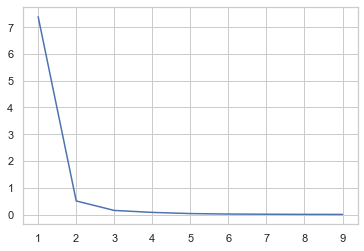

In [126]:
from sklearn.cluster import KMeans
 

x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:,:])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [127]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')
X=A.iloc[:,:].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [128]:
kmeans.cluster_centers_

array([[0.01494783],
       [0.98991414],
       [0.64112244]])

In [129]:
distance=kmeans.fit_transform(X)
distance

array([[0.02113464, 0.95383166, 0.60503997],
       [0.00131233, 0.97365397, 0.62486228],
       [0.01494783, 0.98991414, 0.64112244],
       [0.01209069, 0.98705699, 0.6382653 ],
       [0.00250852, 0.97245778, 0.62366608],
       [0.98505217, 0.01008586, 0.35887756],
       [0.98505217, 0.01008586, 0.35887756],
       [0.01494783, 0.98991414, 0.64112244],
       [0.93648074, 0.03848557, 0.31030613],
       [0.01494783, 0.98991414, 0.64112244],
       [0.01494783, 0.98991414, 0.64112244],
       [0.01494783, 0.98991414, 0.64112244],
       [0.01494783, 0.98991414, 0.64112244],
       [0.01494783, 0.98991414, 0.64112244],
       [0.01494783, 0.98991414, 0.64112244],
       [0.98505217, 0.01008586, 0.35887756],
       [0.01494783, 0.98991414, 0.64112244],
       [0.96815076, 0.00681555, 0.34197615],
       [0.98505217, 0.01008586, 0.35887756],
       [0.01494783, 0.98991414, 0.64112244],
       [0.01494783, 0.98991414, 0.64112244],
       [0.01494783, 0.98991414, 0.64112244],
       [0.

In [130]:
labels=kmeans.labels_
labels

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0])

In [131]:
A['ClustersConsumoMesFranjas'] = labels
A

,eventoFpM0.6,ClustersConsumoMesFranjas
medidor,,
15029835,0.036082,0
15029844,0.016260,0
15029846,0.000000,0
15029847,0.002857,0
15029977,0.017456,0
15842885,1.000000,1
15842894,1.000000,1
16567743,0.000000,0
16567746,0.951429,1


In [161]:
grupofpok = A.loc[A['ClustersConsumoMesFranjas']==0,:]

In [162]:
grupofpbad= A.loc[A['ClustersConsumoMesFranjas']==1,:]

In [163]:
grupofpmd = A.loc[A['ClustersConsumoMesFranjas']==2,:]

In [164]:
display(grupofpBad, grupofpOk, grupofpMd)

,medidor,eventoFpM0.6,ClustersConsumoMesFranjas
5,15842885,1.000000,0
6,15842894,1.000000,0
8,16567746,0.951429,0
15,16951199,1.000000,0
17,16951203,0.983099,0
18,16951205,1.000000,0
28,28877074,0.994872,0


,medidor,eventoFpM0.6,ClustersConsumoMesFranjas
0,15029835,0.036082,1
1,15029844,0.016260,1
2,15029846,0.000000,1
3,15029847,0.002857,1
4,15029977,0.017456,1
7,16567743,0.000000,1
9,16567760,0.000000,1
10,16567761,0.000000,1
11,16567763,0.000000,1
12,16951175,0.000000,1


,medidor,eventoFpM0.6,ClustersConsumoMesFranjas
34,35925291,0.545977,2
39,35947190,0.770992,2
42,52073194,0.527174,2
44,52073201,0.621469,2
69,58706725,0.740000,2


In [168]:
df

,fecha,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,Longitud,CLASIFICACION,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth
0,2019-04-04 06:28:44,15029835,1142597,131.1979,127.9215,131.9837,0.0263,0.0017,0.0264,A3,...,-79.4733,IGLESIA,0.4500,0.0000,bajo,7,0,0,0.225000,14
1,2019-04-04 08:28:44,15029835,1143023,128.4270,127.4788,129.9663,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.1830,0.0090,bajo,7,0,0,0.091500,14
2,2019-04-04 10:28:44,15029835,1143417,125.9862,125.7077,128.2971,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.048000,14
3,2019-04-04 12:28:45,15029835,1143779,126.8655,126.0735,128.6225,0.0013,0.0016,0.0114,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.047993,14
4,2019-04-04 14:28:45,15029835,1144165,125.2453,123.8318,127.2888,0.1740,0.0020,0.0110,A3,...,-79.4733,IGLESIA,0.1230,0.0000,bajo,7,0,0,0.061500,14
5,2019-04-04 16:28:45,15029835,1144530,125.9855,125.0129,128.1258,0.0013,0.0017,0.0112,A3,...,-79.4733,IGLESIA,0.2490,0.0000,bajo,7,0,0,0.124500,14
6,2019-04-05 06:28:47,15029835,1147537,129.0491,127.8222,130.0290,0.0266,0.0017,0.0263,A3,...,-79.4733,IGLESIA,0.4470,0.0000,bajo,7,0,0,0.223500,14
7,2019-04-05 08:28:47,15029835,1147941,127.9209,127.1520,129.3010,0.0013,0.0016,0.0113,A3,...,-79.4733,IGLESIA,0.1650,0.0120,bajo,7,0,0,0.082500,14
8,2019-04-05 10:28:48,15029835,1148346,126.8511,126.2283,128.2661,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0930,0.0000,bajo,7,0,0,0.046494,14
9,2019-04-05 12:55:05,15029835,1148711,125.7741,124.2303,127.2888,0.0015,0.0016,0.0111,A3,...,-79.4733,IGLESIA,0.0720,0.0000,bajo,7,0,0,0.029532,14
